# Use Case: CM2.6 Eddy Statistics

In [1]:
import xarray as xr
xr.__version__

'0.10.0rc1-10-g4caae2e'

In [2]:
from dask.distributed import Client
client = Client('tcp://129.236.21.48:8786')
client

Client Scheduler: tcp://129.236.21.48:8786 Dashboard: http://129.236.21.48:8787,Cluster Workers: 1 Cores: 24 Memory: 540.94 GB


In [6]:
ddir = '/swot/SUM01/CM2.6/control/'
fname = ddir + '*.ocean_minibling_field_temp.nc'
ds = xr.open_mfdataset(fname, chunks={'st_ocean': 1, 'time': 1})
ds

/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/xarray-0.10.0rc1_10_g4caae2e-py3.5.egg/xarray/conventions.py:411: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/xarray-0.10.0rc1_10_g4caae2e-py3.5.egg/xarray/conventions.py:430: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


<xarray.Dataset>
Dimensions:         (nv: 2, st_edges_ocean: 51, st_ocean: 50, time: 1460, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 ...
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 -80.98 -80.94 ...
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 ...
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 20.16 30.29 40.47 ...
  * nv              (nv) float64 1.0 2.0
  * time            (time) object  181-01-03 12:00:00  181-01-08 12:00:00 ...
Data variables:
    temp            (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<shape=(1460, 50, 2700, 3600), chunksize=(1, 1, 2700, 3600)>
    average_T1      (time) object dask.array<shape=(1460,), chunksize=(1,)>
    average_T2      (time) object dask.array<shape=(1460,), chunksize=(1,)>
    average_DT      (time) timedelta64[ns] dask.array<shape=(1460,), chunksize=(1,)>
    time_bounds     (time, nv) timedelta64[ns

In [8]:
sst_mean = ds.temp.isel(st_ocean=0).mean(dim='time').load()

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

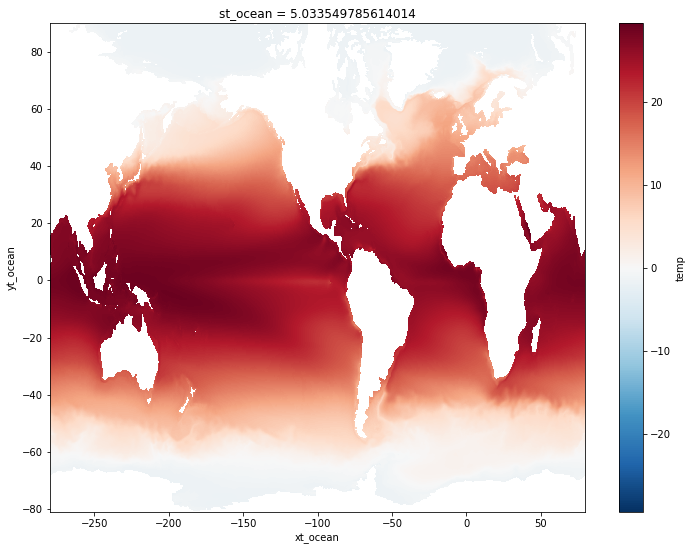

In [10]:
sst_mean.plot()